In [1]:
using BasisFunctions
using FrameFuns
using PyPlot
using Interact, Reactive

  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in require at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dyl

### One-dimensional approximations

In [2]:
B = FourierBasis(61);
D = Interval(-0.5,0.5);
f1(x) = sin(x)
F1 = Fun(f1,B,D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


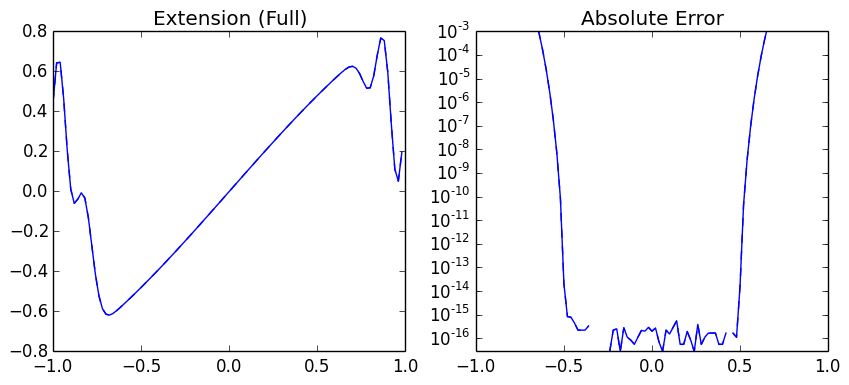

PyObject <matplotlib.text.Text object at 0x31ecfe510>

In [6]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot_expansion(F1,n=100)
subplot(122); FrameFuns.plot_error(F1,f1,n=100)

In [7]:
F1(0.0); G1=BasisFunctions.grid(basis(F1)); [G1[i] for i in eachindex(G1)];F1(0.1111111)

0.1108826174673584 + 2.0816681711721685e-16im

In [8]:
f2(x) = cos(80*x)
F2 = Fun(f2, B, D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


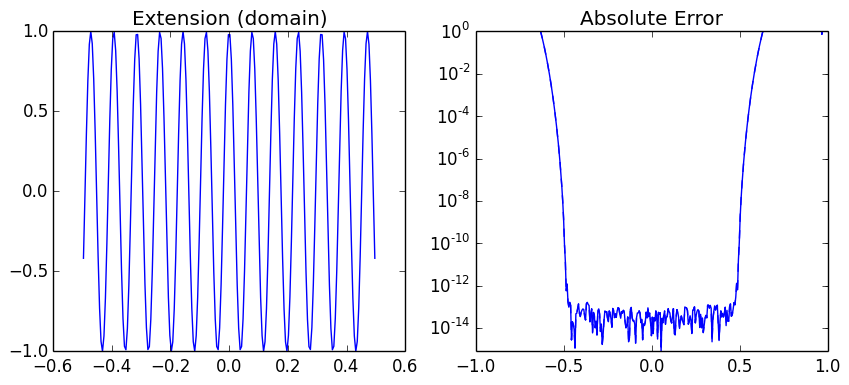

PyObject <matplotlib.text.Text object at 0x31eee8810>

In [9]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot(F2,n=401)
subplot(122); FrameFuns.plot_error(F2,f2,n=401)

In [11]:
F2(0.1)

0.9858988971835949 - 1.3877787807814457e-17im

In [12]:
cos(8)

-0.14550003380861354

In [14]:
f3(x) = cos(10*x.^2)
B = ChebyshevBasis(41)
D = Interval(-1.0,-0.5)+Interval(0.0,0.5)
F3 = Fun(f3,B,D)

A 1-dimensional FrameFun with 41 degrees of freedom.
Basis: Chebyshev series (first kind)
Domain: A union of two domains: 
First domain: the interval [-1.0, -0.5]
Second domain: the interval [0.0, 0.5]



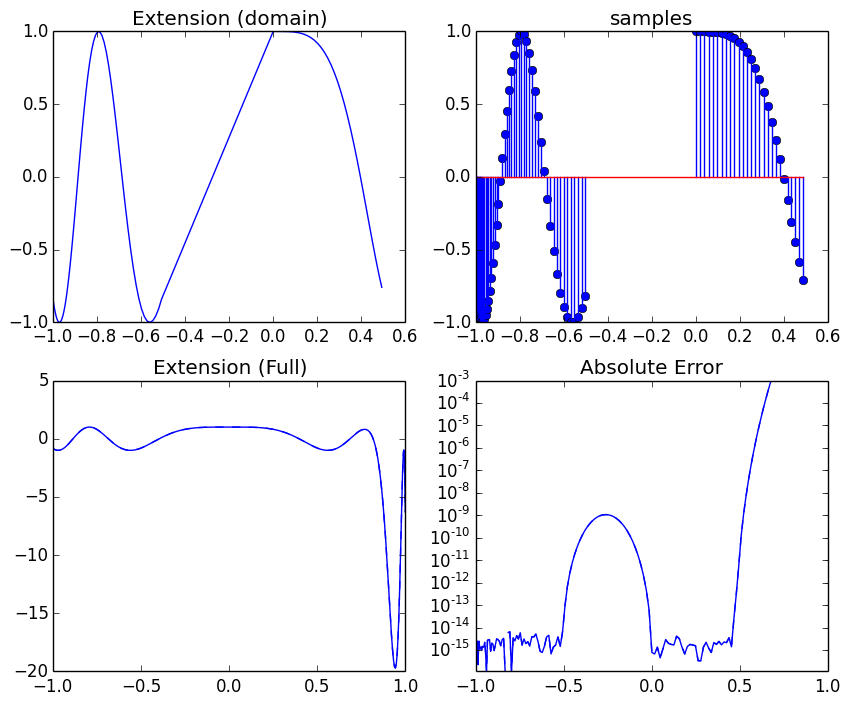

PyObject <matplotlib.text.Text object at 0x32011a810>

In [15]:
figure(figsize=(10,8))
subplot(221); FrameFuns.plot(F3)
subplot(222); FrameFuns.plot_samples(F3)
subplot(223); FrameFuns.plot_expansion(F3)
subplot(224); FrameFuns.plot_error(F3,f3)

### High precision

In [19]:
B = FourierBasis(81,Complex{BigFloat})
D = Interval(-0.5,0.5)
fh(x) = x
Fh = Fun(fh,B,D)

A 1-dimensional FrameFun with 81 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


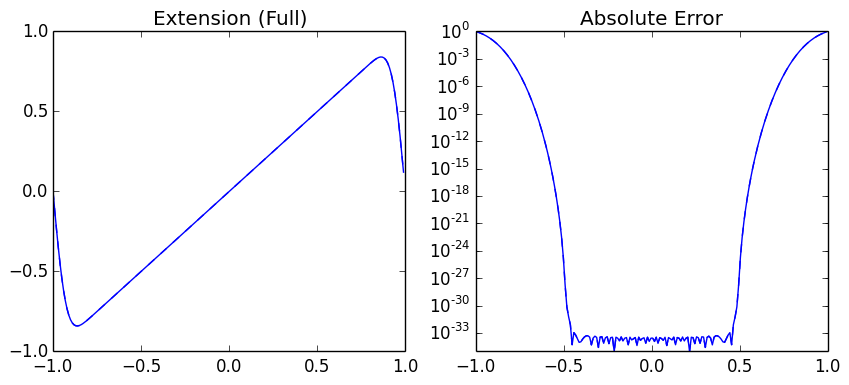

PyObject <matplotlib.text.Text object at 0x31e84b690>

In [20]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot_expansion(Fh)
subplot(122); FrameFuns.plot_error(Fh,fh)

In [22]:
Fh(0.1)-0.1

8.326672684688674056918372576189663960131924056759774503484301377860744988727256e-17 + 7.772551699585000162847716676520359614004400327992653246521333123151732622846184e-77im

In [21]:
left(basis(set(Fh)))

-1

### 2D approximations

##### Simple domains and simple functions

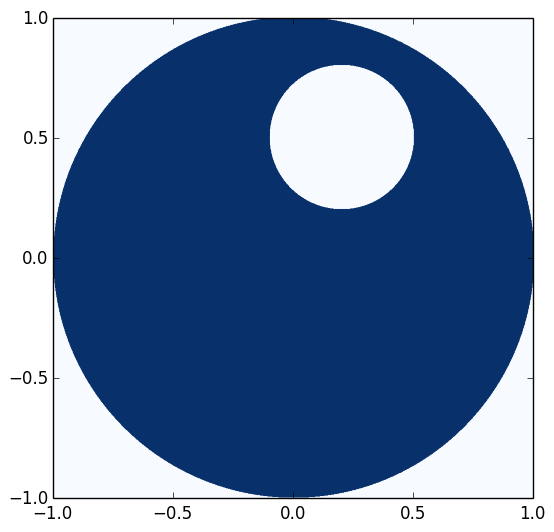

PyObject <matplotlib.image.AxesImage object at 0x31b82c250>

In [23]:
C = Disk(1.0)- Disk(0.3,[0.2; 0.5]); FrameFuns.plot_domain(C, n=1000)

In [27]:
B = FourierBasis(41,-1.3,1.3) ⊗ FourierBasis(41,-1.3,1.3)
f(x,y) = exp(y+x)
F = Fun(f,B,C)

A 2-dimensional FrameFun with 1681 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.3  ,  1.3 ] x Fourier series, mapped to [ -1.3  ,  1.3 ])
Domain: the difference of two domains: 
    First domain: a circle of radius 1.0 centered at [0.0,0.0]
    Second domain: a circle of radius 0.3 centered at [0.2,0.5]



In [19]:
F(-0.6,0.4)

0.8187308532206607 + 2.46847875473577e-10im

In [20]:
f(-0.6, 0.4)

0.8187307530779819

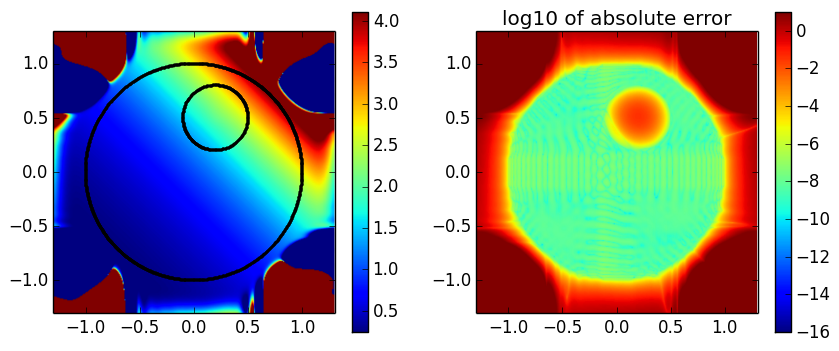

PyObject <matplotlib.text.Text object at 0x32262d190>

In [28]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot_image(F); axis("scaled"); xlim([-1.3,1.3]); ylim([-1.3,1.3])
subplot(122); FrameFuns.plot_error(F,f)

##### Simple domains and harder functions

In [29]:
dom = FrameFuns.randomcircles(10)

a collection of 10 domains

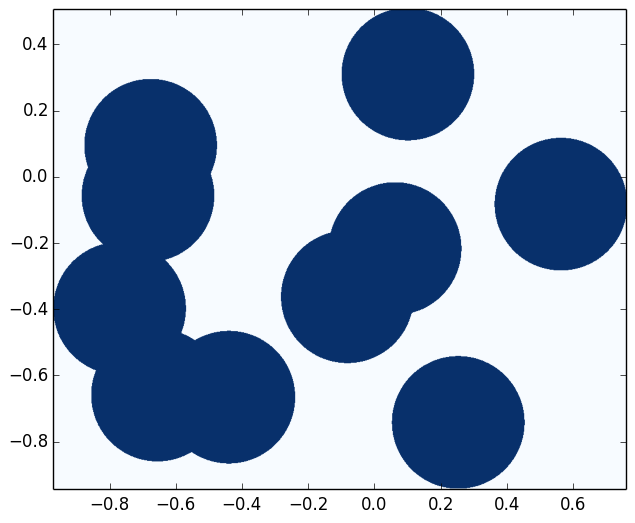

In [30]:
FrameFuns.plot_domain(dom,n=1000);

In [34]:
B = FourierBasis(45) ⊗ ChebyshevBasis(45)
f(x,y) = cos(20*x+22*y)
F = Fun(f,B,dom)

A 2-dimensional FrameFun with 2025 degrees of freedom.
Basis: tensor product (Fourier series x Chebyshev series (first kind))
Domain: a collection of 10 domains


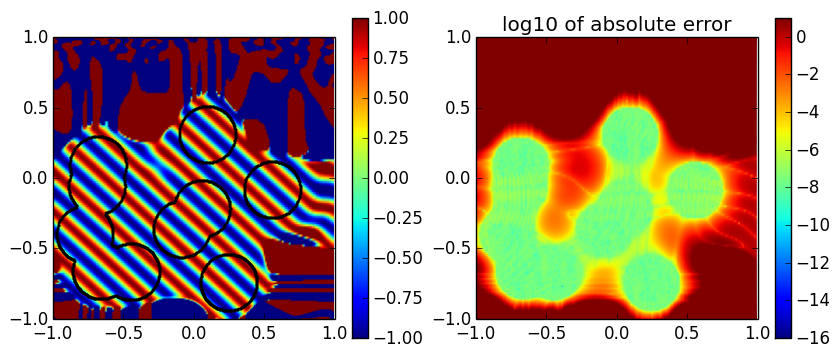

PyObject <matplotlib.text.Text object at 0x322cf0590>

In [35]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot_image(F,n=201)
subplot(122); FrameFuns.plot_error(F,f,n=201)

##### Fractal domains

In [36]:
mandelbrot=FrameFuns.Mandelbrot()

The Mandelbrot set

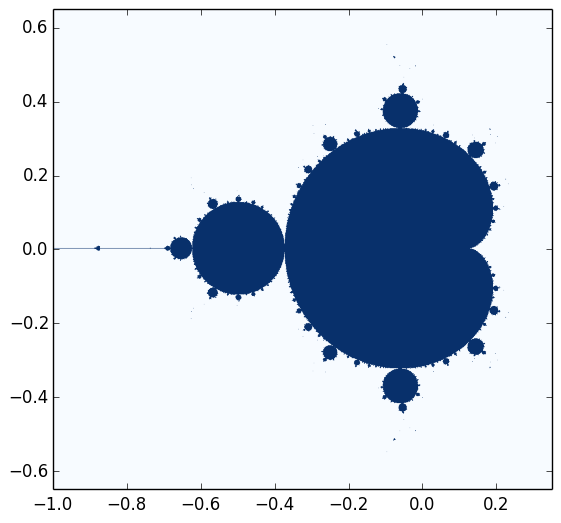

PyObject <matplotlib.image.AxesImage object at 0x31f93ae10>

In [37]:
plot_domain(mandelbrot, n=1001)

In [38]:
B = FourierBasis(31,-1.0,0.35) ⊗ FourierBasis(31,-0.65,0.65)
f(x,y) = cos(10*x*y)
F = Fun(f, B, mandelbrot)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.0  ,  0.35 ] x Fourier series, mapped to [ -0.65  ,  0.65 ])
Domain: The Mandelbrot set


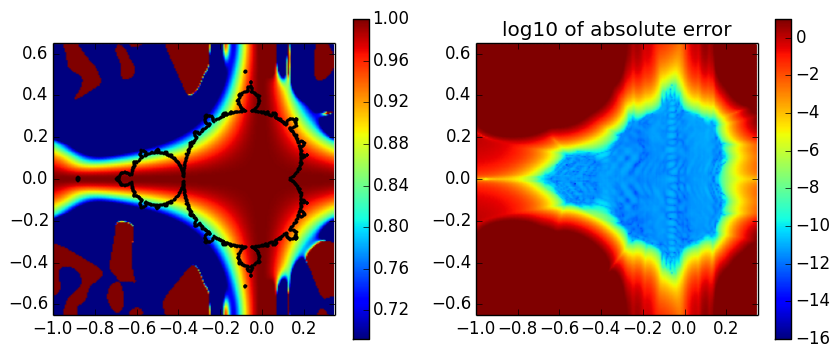

PyObject <matplotlib.text.Text object at 0x32469ac90>

In [40]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot_image(F,n=201)
subplot(122); FrameFuns.plot_error(F,f,n=201)

In [41]:
julia = JuliaSet()

A particular Julia Set also known as the Douady rabbit

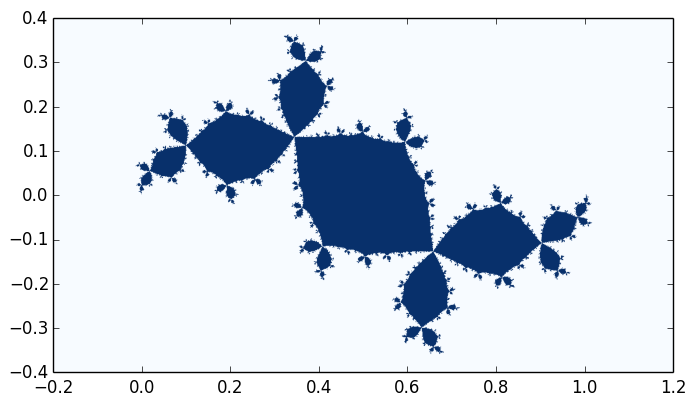

PyObject <matplotlib.image.AxesImage object at 0x31f970f50>

In [42]:
plot_domain(julia)

In [43]:
B = ChebyshevBasis(31,-0.2,1.2) ⊗ ChebyshevBasis(31, -0.4, 0.4)
f(x,y) = cos(10*x*y)
F = Fun(f, B, julia)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Chebyshev series (first kind), mapped to [ -0.2  ,  1.2 ] x Chebyshev series (first kind), mapped to [ -0.4  ,  0.4 ])
Domain: A particular Julia Set also known as the Douady rabbit


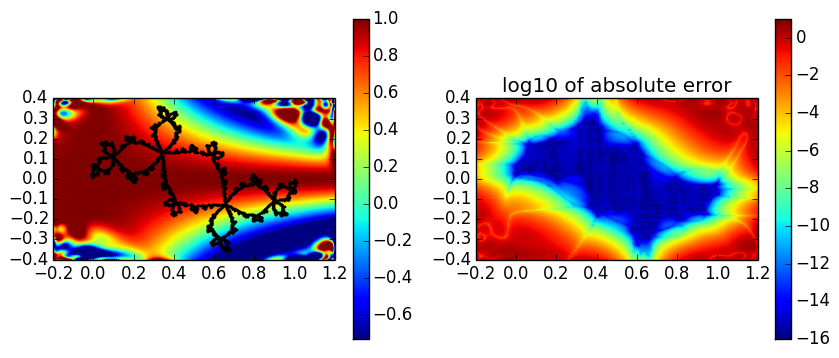

PyObject <matplotlib.text.Text object at 0x327be0fd0>

In [44]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot_image(F,n=201)
subplot(122); FrameFuns.plot_error(F,f,n=201)